In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)

In [3]:
mol_tmpl = """
0 1
O
H 1 **R**
H 1 **R** 2 104.5
symmetry c1
"""

#mol_str = """
#0 1
#O
#H 1 1.6
#H 1 1.6 2 104.5  
#symmetry c1
#"""
r_array = np.linspace(0.6, 2.0, 15)
E_array = []
print(r_array)

options_dict = {'basis': 'sto-3g',
                  'scf_type': 'pk',
                  'e_convergence': 1e-10,
                  'd_convergence': 1e-10
                  }

#mol = psi4.geometry(mol_str)

cavity_options = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'cas',
    'ignore_coupling' : False,
    'number_of_photons' : 1,
    'natural_orbitals' : True,
    'davidson_roots' : 6,
    'davidson_maxdim':10,
    'nact_orbs' : 4,
    'nact_els' : 4
}

#psi4.set_options(options_dict)
#psi4.core.set_output_file('h2o_0.6.out', False)

for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    H2_PF = PFHamiltonianGenerator(mol_str, options_dict, cavity_options)
    E_array.append(H2_PF.cis_e[0])
    print(r, H2_PF.cis_e[0])


## First compute SCF energy using Psi4
#scf_e, wfn = psi4.energy('SCF', return_wfn=True)

#psi4.set_options({'restricted_docc': [3],'active': [4],'num_roots':2})
#fci_energy = psi4.energy('fci',ref_wfn=wfn)
#print(np.allclose(H2_PF.cis_e[0],fci_energy,1e-8,1e-8))



[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

Scratch directory: /tmp/

*** tstart() called on CHEM353Q05NALT
*** at Sat Apr  8 16:56:44 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity =

(72, 24)
iteration 1 subspace dimension 24
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.14438012247887044 -74.61991996732877 N
2 0.14438012247887044 -74.61991996732873 N
3 0.13985874438328888 -73.89338399259486 N
4 0.13985874438328663 -73.8933839925948 N
5 0.16422723092103536 -73.80104198991192 N
6 0.16422723092103358 -73.80104198991188 N


(72, 30)
iteration 2 subspace dimension 30
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.00511387053689882 -74.62793325913933 N
2 0.005113870536899111 -74.62793325913931 N
3 0.008768695732421075 -73.90376272176172 N
4 0.008768695732421648 -73.9037627217616 N
5 0.011263000510559992 -73.81697445007916 N
6 0.011263000510572144 -73.8169744500791 N


(72, 36)
iteration 3 subspace dimension 36
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.00019329422490524162 -74.62794128427156 N
2 0.00019329422490754414 -74.62794128427151 N
3 0.0007959048935735284 -73.9038140517235 N
4 0.0007959048935933989 -73.90

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   3
      Number of AO shells:               5
      Number of primitives:             15
      Number of atomic orbitals:         7
      Number of basis functions:         7

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 812 doubles for integral storage.
  We computed 120 shell quartets total.
  Whereas there are 120 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.0451396789E-01.
  Reciprocal condition number of the overlap matrix is 1.5178245879E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <=

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 

 Completed 1HSO Build in 5.4836273193359375e-05 seconds
 Completed ERI Build in 0.0021321773529052734 seconds 
 Completed 2D build in 0.00025200843811035156 seconds
 Completed 1G build in 2.09808349609375e-05 seconds
Generating all determinants in active space
 Completed determinant list in 0.00036716461181640625 seconds 
 Completed constant offset matrix in 1.7881393432617188e-05 seconds
 Completed Hamiltonian build in 0.011851072311401367 seconds
use unit guess


(72, 24)
iteration 1 subspace dimension 24
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.10835001643255103 -74.96627436610876 N
2 0.10834660862598539 -74.96627435913443 N
3 0.0786475

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   3
      Number of AO shells:               5
      Number of primitives:             15
      Number of atomic orbitals:         7
      Number of basis functions:         7

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 812 doubles for integral storage.
  We computed 120 shell quartets total.
  Whereas there are 120 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.9431767600E-01.
  Reciprocal condition number of the overlap matrix is 2.9841471038E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <=

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 

 Completed 1HSO Build in 5.1975250244140625e-05 seconds
 Completed ERI Build in 0.002147674560546875 seconds 
 Completed 2D build in 0.00023221969604492188 seconds
 Completed 1G build in 1.4781951904296875e-05 seconds
Generating all determinants in active space
 Completed determinant list in 0.00036406517028808594 seconds 
 Completed constant offset matrix in 1.5974044799804688e-05 seconds
 Completed Hamiltonian build in 0.011572837829589844 seconds
use unit guess


(72, 24)
iteration 1 subspace dimension 24
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.14683773389374907 -74.83799657166351 N
2 0.1468377338937476 -74.83799657166347 N
3 0.1289421

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   3
      Number of AO shells:               5
      Number of primitives:             15
      Number of atomic orbitals:         7
      Number of basis functions:         7

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 812 doubles for integral storage.
  We computed 120 shell quartets total.
  Whereas there are 120 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.3762196717E-01.
  Reciprocal condition number of the overlap matrix is 4.4732325804E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <=

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 

 Completed 1HSO Build in 5.602836608886719e-05 seconds
 Completed ERI Build in 0.0021660327911376953 seconds 
 Completed 2D build in 0.00022912025451660156 seconds
 Completed 1G build in 2.3126602172851562e-05 seconds
Generating all determinants in active space
 Completed determinant list in 0.0003631114959716797 seconds 
 Completed constant offset matrix in 1.9073486328125e-05 seconds
 Completed Hamiltonian build in 0.011975765228271484 seconds
use unit guess


(72, 24)
iteration 1 subspace dimension 24
[0, 1, 2, 3, 4, 5]
root residual norm Eigenvalue Convergence
1 0.20149173424689582 -74.63746068603567 N
2 0.20149173424689584 -74.63746068603562 N
3 0.1496980331


*** tstart() called on CHEM353Q05NALT
*** at Sat Apr  8 16:56:46 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line    81 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 
    atoms 2-3 entry H          line    19 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               M

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   3
      Number of AO shells:               5
      Number of primitives:             15
      Number of atomic orbitals:         7
      Number of basis functions:         7

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 812 doubles for integral storage.
  We computed 120 shell quartets total.
  Whereas there are 120 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.3178573479E-01.
  Reciprocal condition number of the overlap matrix is 5.7116834431E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <=

     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000000            0.0000000           -0.0000000
 Dipole Y            :         -0.0000000            0.0000000           -0.0000000
 Dipole Z            :         -1.7975749            2.0381542            0.2405793
 Magnitude           :                                                    0.2405793

 ------------------------------------------------------------------------------------

Start SCF iterations:

Canonical RHF One-electron energy = -112.7726599789830146
CQED-RHF One-electron energy      = -112.7726599789830146
Nuclear repulsion energy          = 4.4007327822836872
Dipole energy                     = 0.0000000000000000

*** tstop() called on CHEM353Q05NALT at Sat Apr  8 16:56:46 2023
Module time:
	user time   

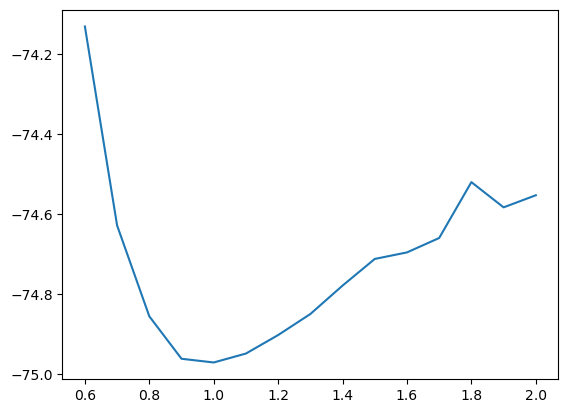

In [4]:
from matplotlib import pyplot as plt
plt.plot(r_array, E_array)

cnt = 0
for j in range(0,2):
    for i in range(H2_PF.CISnumDets):
        print(cnt, H2_PF.CISdets[i], j)
        cnt += 1
#numDets = H2_PF.CISnumDets 
#halfDets = numDets // 2
#print(halfDets)

In [ ]:
print(1.6, H2_PF.cis_e[0])